To compare the relative frequency of themes in speeches from Least Developed Countries (LDCs) and Small Island Developing States (SIDS), we need to:

1. Parse the `Theme_Combined` column to handle multiple themes per speech.
2. Calculate the frequency of each theme for LDC and SIDS speeches.
3. Perform a statistical test to determine if there are significant differences in theme frequencies between the 'Yes' and 'No' groups for LDC and SIDS.

Here's a step-by-step guide and Python code to perform this analysis:

### Step 1: Load the Data and Parse Themes

First, we'll load the data and parse the `Theme_Combined` column to separate multiple themes.


In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Function to split themes
def split_themes(row):
    return row.split()

# Apply the function and explode the dataframe
df['Themes'] = df['Theme_Combined'].apply(split_themes)
df_exploded = df.explode('Themes')

# Display the first few rows to verify
df_exploded.head()



,Country Name,Event,Language,Region,annotation_id,no GG detected,region_specification,Theme_Combined,Year,Cumulative CO2,GDP_capita,Annual_Capita_CO2_Consumption,HDI,HDI_Level,LDC,SIDS,Themes
0,Niger,COP26,translated,Africa,349,Yes,NaN,AG,2021,0.003010,590.629495,0.120343,0.394,Low,Yes,No,AG
1,Togo,COP28,translated,Africa,601,Yes,NaN,AG,2022,0.004017,942.649902,0.291067,0.547,Low,Yes,No,AG
2,Lesotho,COP24,en,Africa,35,Yes,NaN,NG,2018,0.003647,1162.978854,1.078515,0.521,Low,Yes,No,NG
3,Mauritius,COP24,en,Africa,42,Yes,NaN,NG,2018,0.006598,11643.460596,3.442285,0.796,High,No,Yes,NG
4,Sierra Leone,COP24,en,Africa,53,Yes,NaN,NG,2018,0.002123,519.649964,0.130918,0.458,Low,Yes,No,NG


### Step 2: Calculate Theme Frequencies

Next, we need to calculate the frequency of each theme for LDC and SIDS speeches.



In [2]:

# Calculate theme frequencies for LDCs
ldc_frequencies = df_exploded.groupby(['Themes', 'LDC']).size().unstack(fill_value=0)

# Calculate theme frequencies for SIDS
sids_frequencies = df_exploded.groupby(['Themes', 'SIDS']).size().unstack(fill_value=0)

# Display the frequencies to verify
print(ldc_frequencies)
print(sids_frequencies)

LDC      No  Yes
Themes          
AG       37    6
NG      180   56
S_dom    42   16
S_int    42    3
S_reg    14    2
W_dom    28   17
W_int    49    8
W_reg    16    3
SIDS     No  Yes
Themes          
AG       26   17
NG      176   60
S_dom    55    3
S_int    42    3
S_reg    13    3
W_dom    41    4
W_int    52    5
W_reg    18    1



### Step 3: Perform Statistical Tests

We can use a chi-square test to determine if there are significant differences in theme frequencies between the 'Yes' and 'No' groups for LDC and SIDS.



In [3]:

from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(frequencies):
    chi2, p, _, _ = chi2_contingency(frequencies)
    return p

# Perform chi-square test for LDC
ldc_p_values = ldc_frequencies.apply(chi_square_test, axis=1)

# Perform chi-square test for SIDS
sids_p_values = sids_frequencies.apply(chi_square_test, axis=1)

# Combine results into a DataFrame
results = pd.DataFrame({
    'LDC_P_Value': ldc_p_values,
    'SIDS_P_Value': sids_p_values
})

# Display significant results (p < 0.05)
significant_results = results[(results['LDC_P_Value'] < 0.05) | (results['SIDS_P_Value'] < 0.05)]
print(significant_results)



Empty DataFrame
Columns: [LDC_P_Value, SIDS_P_Value]
Index: []



### Explanation:

1. **Loading and Parsing Themes:**
   - Load the dataset using `pandas`.
   - Split the `Theme_Combined` column into individual themes and explode the DataFrame so each theme has its own row.

2. **Calculating Frequencies:**
   - Group the exploded DataFrame by `Themes` and `LDC` or `SIDS` columns and calculate the size to get the frequency of each theme.

3. **Statistical Testing:**
   - Use the chi-square test (`scipy.stats.chi2_contingency`) to compare the frequency distributions of themes between 'Yes' and 'No' groups for LDC and SIDS.
   - Combine the p-values from the tests into a DataFrame and filter for significant results (p < 0.05).

This analysis will give you a detailed understanding of which themes are significantly more common in speeches from LDCs and SIDS. Make sure to verify the assumptions of the chi-square test, especially the expected frequencies, before finalizing your analysis.

In [5]:
import pandas as pd
from scipy.stats import fisher_exact

# Provided theme frequency tables
ldc_data = {
    'Themes': ['AG', 'NG', 'S_dom', 'S_int', 'S_reg', 'W_dom', 'W_int', 'W_reg'],
    'No': [37, 180, 42, 42, 14, 28, 49, 16],
    'Yes': [6, 56, 16, 3, 2, 17, 8, 3]
}

sids_data = {
    'Themes': ['AG', 'NG', 'S_dom', 'S_int', 'S_reg', 'W_dom', 'W_int', 'W_reg'],
    'No': [26, 176, 55, 42, 13, 41, 52, 18],
    'Yes': [17, 60, 3, 3, 3, 4, 5, 1]
}

# Create DataFrames
ldc_df = pd.DataFrame(ldc_data).set_index('Themes')
sids_df = pd.DataFrame(sids_data).set_index('Themes')

# Function to perform Fisher's exact test
def fisher_test(row, total_no, total_yes):
    contingency_table = [[row['No'], row['Yes']], [total_no - row['No'], total_yes - row['Yes']]]
    _, p_value = fisher_exact(contingency_table, alternative='two-sided')
    return p_value

# Apply Fisher's exact test to each row
ldc_df['P_Value'] = ldc_df.apply(lambda row: fisher_test(row, sum(ldc_df['No']), sum(ldc_df['Yes'])), axis=1)
sids_df['P_Value'] = sids_df.apply(lambda row: fisher_test(row, sum(sids_df['No']), sum(sids_df['Yes'])), axis=1)

# Combine results into a DataFrame
results = pd.DataFrame({
    'LDC_P_Value': ldc_df['P_Value'],
    'SIDS_P_Value': sids_df['P_Value']
})

# Display significant results (p < 0.05)
significant_results = results[(results['LDC_P_Value'] < 0.05) | (results['SIDS_P_Value'] < 0.05)]
print(significant_results)


        LDC_P_Value  SIDS_P_Value
Themes                           
AG         0.248903      0.000700
NG         0.239237      0.000259
S_dom      0.235166      0.003652
S_int      0.012029      0.041966
W_dom      0.007611      0.106374
W_int      0.173158      0.046783


KeyError: "None of ['Themes'] are in the columns"

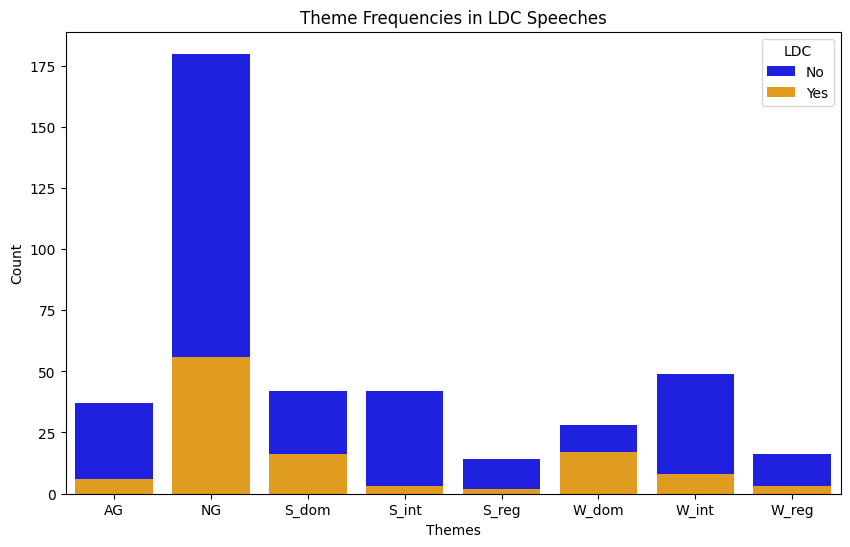

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the original data with p-values for plotting
ldc_df['Group'] = 'LDC'
sids_df['Group'] = 'SIDS'
combined_df = pd.concat([ldc_df, sids_df]).reset_index()

# Function to add significance annotations
def annotate_bars(ax, df, col_name):
    for p in ax.patches:
        theme = p.get_x() + p.get_width() / 2
        value = p.get_height()
        group = df.loc[theme, 'Group']
        p_value = df.loc[theme, col_name]
        if p_value < 0.05:
            ax.annotate('*', (theme, value), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

# Plot theme frequencies for LDC
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Themes', y='No', data=combined_df[combined_df['Group'] == 'LDC'], label='No', color='blue', ax=ax)
sns.barplot(x='Themes', y='Yes', data=combined_df[combined_df['Group'] == 'LDC'], label='Yes', color='orange', ax=ax)
ax.set_title('Theme Frequencies in LDC Speeches')
ax.set_ylabel('Count')
ax.legend(title='LDC')
annotate_bars(ax, ldc_df.set_index('Themes'), 'P_Value')
plt.xticks(rotation=45)
plt.show()

# Plot theme frequencies for SIDS
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Themes', y='No', data=combined_df[combined_df['Group'] == 'SIDS'], label='No', color='blue', ax=ax)
sns.barplot(x='Themes', y='Yes', data=combined_df[combined_df['Group'] == 'SIDS'], label='Yes', color='orange', ax=ax)
ax.set_title('Theme Frequencies in SIDS Speeches')
ax.set_ylabel('Count')
ax.legend(title='SIDS')
annotate_bars(ax, sids_df.set_index('Themes'), 'P_Value')
plt.xticks(rotation=45)
plt.show()
